# Eager Mode Mnist

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

mnist image : 28,28 

In [2]:
mnist = tf.keras.datasets.mnist

# Create Model

In [3]:
def create_model():
    model = tf.keras.Sequential()
    # Build the model
    model.add(tf.keras.layers.Conv2D(16,[3,3], activation='relu'))
    model.add(tf.keras.layers.Conv2D(16,[3,3], activation='relu'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(10))
    return model 

In [4]:
def create_model2():
    model = tf.keras.Sequential()
    # Build the model
    model.add(tf.keras.layers.Conv2D(16,[3,3], activation='relu', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(16,[3,3], activation='relu', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(10))
    return model 

In [5]:
model = create_model2()
print(model)

# Load Model 

In [6]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [7]:
for images, labels in dataset.take(1):
    print(images[0:1].shape)
    print("Logis", model(images[0:1].numpy()))

(1, 28, 28, 1)
Logis tf.Tensor(
[[-0.13618481  0.03267801  0.02558108  0.06387131  0.02490517 -0.01797117
   0.08664734  0.01698757  0.00121153  0.0305122 ]], shape=(1, 10), dtype=float32)


# Define Optimizer

In [8]:
optimizer = tf.train.AdamOptimizer()


# Train

In [9]:
# loss_history = []
# for ( batch, (images, labels)) in enumerate(dataset.take(400)):
#     if batch % 80== 0 :
#         print()
#     print('.', end='')
#     with tf.GradientTape() as tape:
#         logits = model(images, training=True)
#         loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)
        
#     loss_history.append(loss_value.numpy())
#     grads = tape.gradient(loss_value, model.variables)
#     optimizer.apply_gradients(zip(grads, model.variables), 
#                              global_step=tf.train.get_or_create_global_step())

In [10]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')
plt.show()
#Text(0, 0.5, 'Loss [entropy]')

NameError: name 'loss_history' is not defined

In [11]:
def loss(model, inputs, targets):
    error = model(inputs) - targets
    return tf.resuce_mean(tf.square(error))

In [12]:
epoch=2
loss_history = []
acc_history = []
for _ in range(epoch):
    for ( batch, (images, labels)) in enumerate(dataset.take(6000)):
        accuracy = tfe.metrics.Accuracy('accuracy', dtype=tf.float32)
        with tf.GradientTape() as tape:
            logits = model(images, training=True)
            loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)
            accuracy(tf.argmax(logits, axis=1, output_type=tf.int64),
                    tf.cast(labels, tf.int64))

        loss_history.append(loss_value.numpy())
        acc_history.append(accuracy.result())
        grads = tape.gradient(loss_value, model.variables)
        optimizer.apply_gradients(zip(grads, model.variables), 
                                 global_step=tf.train.get_or_create_global_step())
        if batch % 20== 0 :
            print("Loss at step {:03d}: {:.3f}, Accu : {:.3f}".format(batch, loss_value, accuracy.result()))
        

Loss at step 000: 2.294, Accu : 0.125
Loss at step 020: 2.213, Accu : 0.344
Loss at step 040: 2.013, Accu : 0.438
Loss at step 060: 2.191, Accu : 0.281
Loss at step 080: 2.033, Accu : 0.312
Loss at step 100: 1.987, Accu : 0.438
Loss at step 120: 2.052, Accu : 0.250
Loss at step 140: 1.723, Accu : 0.500
Loss at step 160: 1.898, Accu : 0.312
Loss at step 180: 1.984, Accu : 0.281
Loss at step 200: 1.810, Accu : 0.375
Loss at step 220: 1.704, Accu : 0.562
Loss at step 240: 1.746, Accu : 0.312
Loss at step 260: 1.664, Accu : 0.438
Loss at step 280: 1.551, Accu : 0.500
Loss at step 300: 1.819, Accu : 0.375
Loss at step 320: 1.517, Accu : 0.469
Loss at step 340: 1.709, Accu : 0.406
Loss at step 360: 1.527, Accu : 0.438
Loss at step 380: 1.860, Accu : 0.438
Loss at step 400: 1.493, Accu : 0.500
Loss at step 420: 1.433, Accu : 0.594
Loss at step 440: 1.546, Accu : 0.688
Loss at step 460: 1.397, Accu : 0.594
Loss at step 480: 1.338, Accu : 0.719
Loss at step 500: 1.521, Accu : 0.656
Loss at step

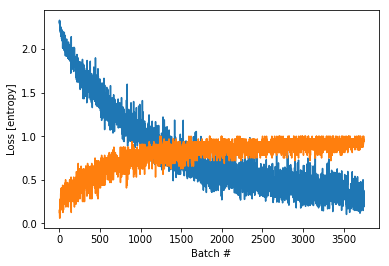

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.plot(acc_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')
plt.show()